In [1]:
# This is the import library used for the capstone

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity

import numpy as np
import pandas as pd
#import plotly.express as px

import scipy.integrate as integrate
import scipy.special as special

import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
%matplotlib inline

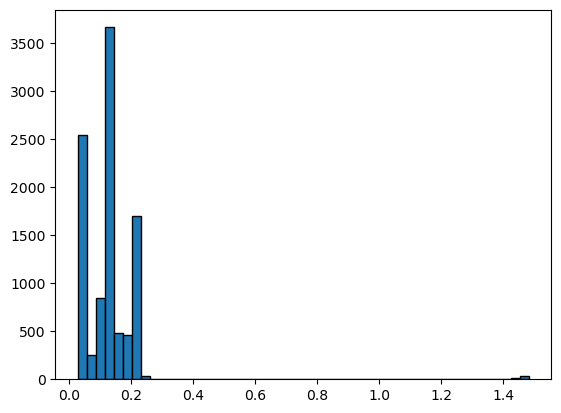

In [2]:
# This line of code allows us to read the csv using the pandas framework. This allows for
# python to transform data. This libaray is used as a standard across data scientist/analyst

df = pd.read_csv('Minutes.csv')
df = df["Jasper Ave -Circuit_5 (kWatts)"]
counts, bins, patches = plt.hist(df, bins = 50, edgecolor = 'black')


In [3]:
# to see how big the our data set
df.shape

(10074,)

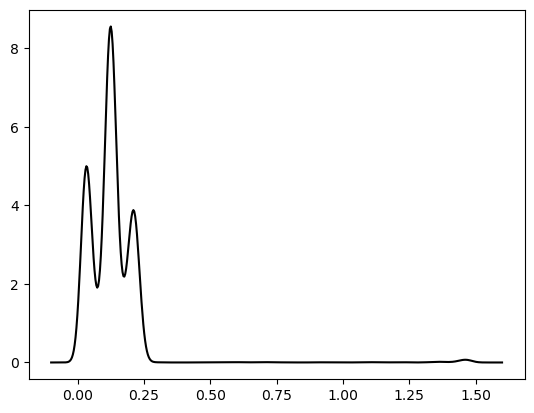

In [4]:
# The following function produces a KDE. We are going to streamline raw data from Sustain (Peter)
# into analytical data. We will be able to set the first 2 weeks as a way to produce a amounlous data
# detection

scipy_kernel = gaussian_kde(df)
u = np.linspace(-0.1, 1.6, 500)
kernal_data = scipy_kernel.evaluate(u)
plt.plot(u, kernal_data,'k')

In [5]:
'''Transition everything to Kernal Density for larger data volumneX_plot = np.linspace(-0.1, 1.6, 500)[:, np.newaxis]


dg = np.array(df)[:, None]
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(dg)
log_dens = kde.score_samples(X_plot)



#plt.plot(X_plot[:, 0], np.exp(log_dens),'k')'''


'Transition everything to Kernal Density for larger data volumneX_plot = np.linspace(-0.1, 1.6, 500)[:, np.newaxis]\n\n\ndg = np.array(df)[:, None]\nkde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(dg)\nlog_dens = kde.score_samples(X_plot)\n\n\n\n#plt.plot(X_plot[:, 0], np.exp(log_dens),\'k\')'

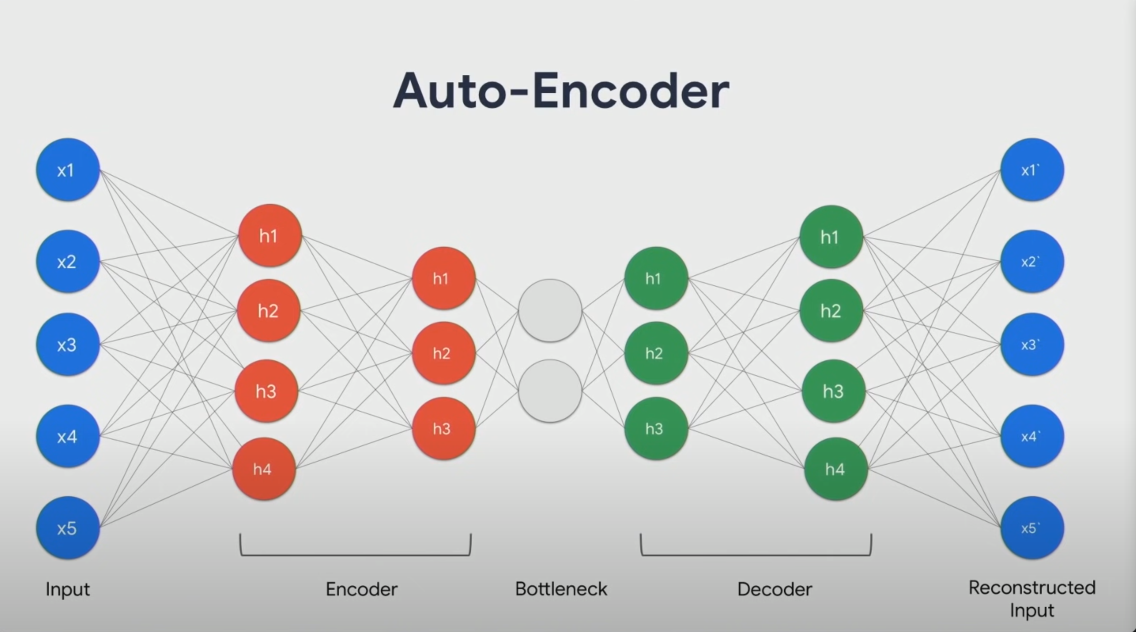

In [6]:
# All machine learning follows the model -> compile -> fit -> print prediction model
# All model will be used in 
# We want our model to look like the image provided

from IPython.display import Image
im = Image("autoencoder_example.png")

display(im)


In [16]:
# initilize the x train and the y train to create a prediction model
# combine the data point to get [x,y] for the prediction model
# create labels also


# finish the loading to NN and call it a day

# issue data leakage

# went from 500 to 400 why?
x_data = u
y_data = kernal_data
'''
new_data_point = []
for i in range(y_train.shape[0]):
    new_point = [x_data[i], y_data[i]]
    new_data_point.append(new_point)

new_data_point = np.array(new_data_point)
'''

# deal with the 500 to 400 data loss later

label = []
for i in range(y_data.shape[0]):
    label.append(1.0)

label = np.array(label)


# Do I need this process?
train_data, test_data, train_labels, test_labels = train_test_split(
    y_data, label, test_size=0.2, random_state=21
)


In [17]:
# normalize the data to [0, 1]
# To normalize the KDE, we can divide it by its integral over its support
# so that it integrates to 1 and represents a valid probability density function

# we normalize just the y values. Keep the x



# idc about normalization, just get it to load at the end of it daY!!!!!!!!!!!!



min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)


In [19]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

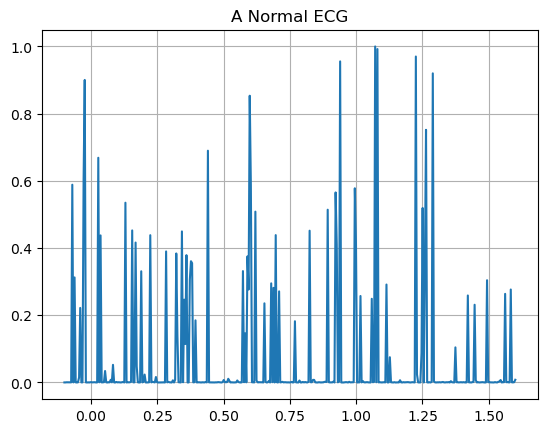

In [23]:
# unpack to see the data one more time

plt.grid()
plt.plot(np.linspace(-0.1, 1.6, 400), normal_train_data)
plt.title("A Normal ECG")
plt.show()

In [53]:
# Create a model for it to pass through anomolydetector

# Need test labels to have it all true

# need to mkae it 2d
normal_train_data_test = normal_train_data
normal_train_data_test = tf.reshape(normal_train_data_test, shape=(1,400))
normal_train_data_test

test_data_test = test_data
test_data_test = tf.reshape(test_data_test, shape=(1,100))
test_data_test.shape

TensorShape([1, 100])

In [35]:
# Model section: Create the "neurons" of the model
# Input value needs to be the size of the given data given

# No need to flatten our data because it is already 1D, making it very easy

# Data is hard coded. Can make it much more dynamic later


# how to feed data from KDE is the main problem. Also what is the model to use 
# Need to load data


class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
  
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(400, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

# what is soft max

In [36]:
autoencoder.compile(optimizer='SGD', loss='MSE')

In [49]:

history = autoencoder.fit(normal_train_data_test, normal_train_data_test,
          epochs=20, 
          batch_size=512,
          validation_data=(test_data_test, test_data_test))

# fix this later. Something wrong with raw_train_data

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.2194

ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).

Input 0 of layer "dense_18" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (100,)

Call arguments received by layer "sequential" "                 f"(type Sequential):
  • inputs=tf.Tensor(shape=(100,), dtype=float32)
  • training=False
  • mask=None

In [ ]:
# redo the KDE
# Integrate KDE to get normailzed data
# feed it to the NN
# give this a rest, finish up the presentation